Molecule 1 (Energy: -24.457357 a.u.):
  Al: 12

Molecule 2 (Energy: -24.476637 a.u.):
  Al: 12

Molecule 3 (Energy: -24.477997 a.u.):
  Al: 12

Molecule 4 (Energy: -24.478024 a.u.):
  Al: 12

Molecule 5 (Energy: -24.478024 a.u.):
  Al: 12

Molecule 6 (Energy: -24.478011 a.u.):
  Al: 12



3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Step 1, Energy: -24.457357 a.u.


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Step 2, Energy: -24.476637 a.u.


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Step 3, Energy: -24.477997 a.u.


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Step 4, Energy: -24.478024 a.u.


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Step 5, Energy: -24.478024 a.u.


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Step 6, Energy: -24.478011 a.u.


FileNotFoundError: [Errno 2] No such file or directory: '/Users/karim/github/2024_bmw_airbus/literature/as_embedding_cp2k/Al_slab/test_go_output/energy_progression.png'

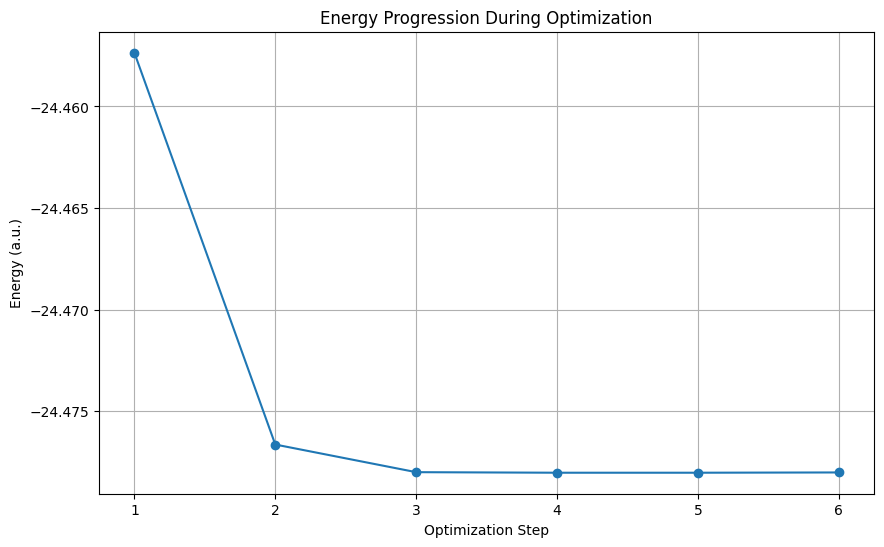

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import py3Dmol
from IPython.display import display

def parse_xyz(content):
    molecules = []
    lines = content.strip().split('\n')
    i = 0
    while i < len(lines):
        if lines[i].strip().isdigit():
            num_atoms = int(lines[i].strip())
            energy_line = lines[i + 1].strip()
            energy = float(energy_line.split('=')[-1].strip())
            atom_lines = lines[i + 2:i + 2 + num_atoms]
            atoms = []
            for line in atom_lines:
                parts = line.split()
                atom_symbol = parts[0]
                x, y, z = float(parts[1]), float(parts[2]), float(parts[3])
                atoms.append((atom_symbol, x, y, z))
            molecules.append((energy, atoms))
            i += 2 + num_atoms
        else:
            i += 1
    return molecules

def custom_visualize_structure(molecules):
    fig, axes = plt.subplots(len(molecules), 1, figsize=(8, 4*len(molecules)))
    if len(molecules) == 1:
        axes = [axes]
    
    for idx, ((energy, atoms), ax) in enumerate(zip(molecules, axes)):
        ax.set_aspect('equal')
        ax.set_xlim(-2, 2)
        ax.set_ylim(-2, 2)
        ax.axis('off')
        
        for atom in atoms:
            if atom[0] == 'C':
                ax.plot(atom[1], atom[2], 'ko', markersize=10)
            elif atom[0] == 'H':
                ax.plot(atom[1], atom[2], 'bo', markersize=5)
        
        ax.set_title(f'Energy: {energy:.6f} a.u.')
    
    plt.tight_layout()
    return fig

def visualize_3d(molecules):
    for idx, (energy, atoms) in enumerate(molecules):
        viewer = py3Dmol.view(width=400, height=400)
        xyz_string = f"{len(atoms)}\nEnergy = {energy}\n"
        xyz_string += "\n".join([f"{atom[0]} {atom[1]} {atom[2]} {atom[3]}" for atom in atoms])
        viewer.addModel(xyz_string, "xyz")
        viewer.setStyle({'stick':{}})
        viewer.zoomTo()
        viewer.setBackgroundColor('white')
        display(viewer)
        print(f"Step {idx+1}, Energy: {energy:.6f} a.u.")

def plot_energy_progression(molecules):
    energies = [mol[0] for mol in molecules]
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(energies) + 1), energies, marker='o')
    plt.xlabel('Optimization Step')
    plt.ylabel('Energy (a.u.)')
    plt.title('Energy Progression During Optimization')
    plt.grid(True)
    plt.savefig('test_go_output/energy_progression.png', dpi=300)
    plt.close()

def calculate_rmsd(ref_atoms, atoms):
    ref_coords = np.array([atom[1:] for atom in ref_atoms])
    coords = np.array([atom[1:] for atom in atoms])
    diff = ref_coords - coords
    return np.sqrt(np.mean(np.sum(diff**2, axis=1)))

def plot_rmsd_progression(molecules):
    ref_atoms = molecules[0][1]
    rmsds = [calculate_rmsd(ref_atoms, mol[1]) for mol in molecules]
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(rmsds) + 1), rmsds, marker='o')
    plt.xlabel('Optimization Step')
    plt.ylabel('RMSD (Angstrom)')
    plt.title('RMSD Progression During Optimization')
    plt.grid(True)
    plt.savefig('test_go_output/rmsd_progression.png', dpi=300)
    plt.close()

def print_molecule_composition(molecules):
    for i, (energy, atoms) in enumerate(molecules):
        print(f"Molecule {i+1} (Energy: {energy:.6f} a.u.):")
        atom_counts = {}
        for atom in atoms:
            atom_counts[atom[0]] = atom_counts.get(atom[0], 0) + 1
        for atom_type, count in atom_counts.items():
            print(f"  {atom_type}: {count}")
        print()

# Main execution
if __name__ == "__main__":
    # Read the XYZ file content
    xyz_filename = 'al_slab_opt/al_slab_opt-pos-1.xyz'  # replace with your actual file path
    with open(xyz_filename, 'r') as f:
        content = f.read()

    # Parse the XYZ content
    molecules = parse_xyz(content)

    # Print molecule composition
    print_molecule_composition(molecules)

    # Visualize the 2D structures
    fig = custom_visualize_structure(molecules)
    fig.savefig('al_slab_opt/visualized_molecules.png', dpi=300)
    plt.close(fig)

    # Visualize the 3D structures
    visualize_3d(molecules)

    # Run additional analyses
    plot_energy_progression(molecules)
    plot_rmsd_progression(molecules)

    # Print statistical information
    energies = [mol[0] for mol in molecules]
    print(f"Energy statistics:")
    print(f"  Min: {min(energies):.6f} a.u.")
    print(f"  Max: {max(energies):.6f} a.u.")
    print(f"  Mean: {np.mean(energies):.6f} a.u.")
    print(f"  Std Dev: {np.std(energies):.6f} a.u.")

    print("Analysis complete. Output files saved in the 'test_go_output' directory.")

In [5]:
import nglview as nv
from ase.io import read
from IPython.display import display

def visualize_with_nglview(xyz_file):
    atoms = read(xyz_file)
    view = nv.show_ase(atoms)
    return view

# Usage for a single structure
xyz_file = 'al_slab_opt/al_slab_opt-pos-1.xyz'  # replace with your actual file path
view = visualize_with_nglview(xyz_file)
display(view)

# To visualize all steps in your optimization:
def visualize_all_steps(molecules):
    for i, (energy, atoms) in enumerate(molecules):
        print(f"Step {i+1}, Energy: {energy:.6f} a.u.")
        
        # Create a temporary XYZ file for this step
        temp_xyz = f'temp_step_{i+1}.xyz'
        with open(temp_xyz, 'w') as f:
            f.write(f"{len(atoms)}\n")
            f.write(f"Energy = {energy}\n")
            for atom in atoms:
                f.write(f"{atom[0]} {atom[1]} {atom[2]} {atom[3]}\n")
        
        view = visualize_with_nglview(temp_xyz)
        display(view)
        
        # Clean up temporary file
        import os
        os.remove(temp_xyz)

# Call this function with your molecules list
# visualize_all_steps(molecules)

NGLWidget()